In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from copy import copy

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'
datadir2 = '/scratch/dlobelle/Kooi_data/data_output/'

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
region = 'EqPac'
mortality = 0.39              # [d-1]
runtime = 170                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = ['markov_0_KPP_reflect_tidal','markov_0_KPP_reflectsudden_tidal'] #'fixed', 
sizebinedges = [1e-3, 1e-4, 1e-5]
res ='1x1'

In [5]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_'+res+'res_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_'+res+'res_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

# ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
#ds_1 = xr.open_dataset(datadir2+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
#ds_2 = xr.open_dataset(datadir2+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[2]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [6]:
dslist = [ds_0, ds_1] #, ds_2]

In [7]:
#print(dslist)

In [8]:
times = ds_0['time'][0,:].astype('O')
timelabels = ds_0['time'][0,:].dt.strftime('%Y-%m-%d')

In [9]:
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177', '#fbb4b9']

In [12]:
number_of_trajectories_to_plot = 200
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 200 of 10000 trajectories
plotting every 50 particles


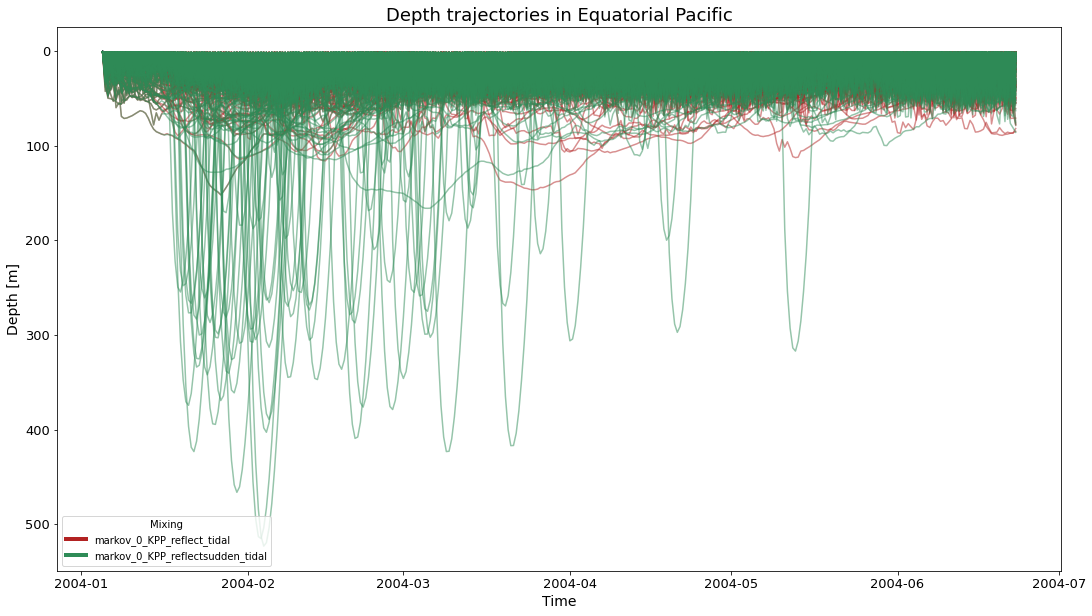

In [13]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].T[:,::f_plt], dslist[i]['z'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.5, label = mixing[i])
# ax.plot(ds['time'].T[:,::f_plt], ds['z'].T[:,::f_plt], c=mixing_cmap[2], alpha=0.3, label = mixing[1])

ax.set_title('Depth trajectories in '+regions[region], fontsize=18)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
# ax.set_ylim(100,0)
ax.tick_params(axis='both', labelsize=13)
ax.invert_yaxis()
# ax.set_xticks(times[::6].values)
# ax.set_xticklabels(timelabels[::6].values)
# ax.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
               Line2D([0], [0], color=mixing_cmap[1], lw=4)]

ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

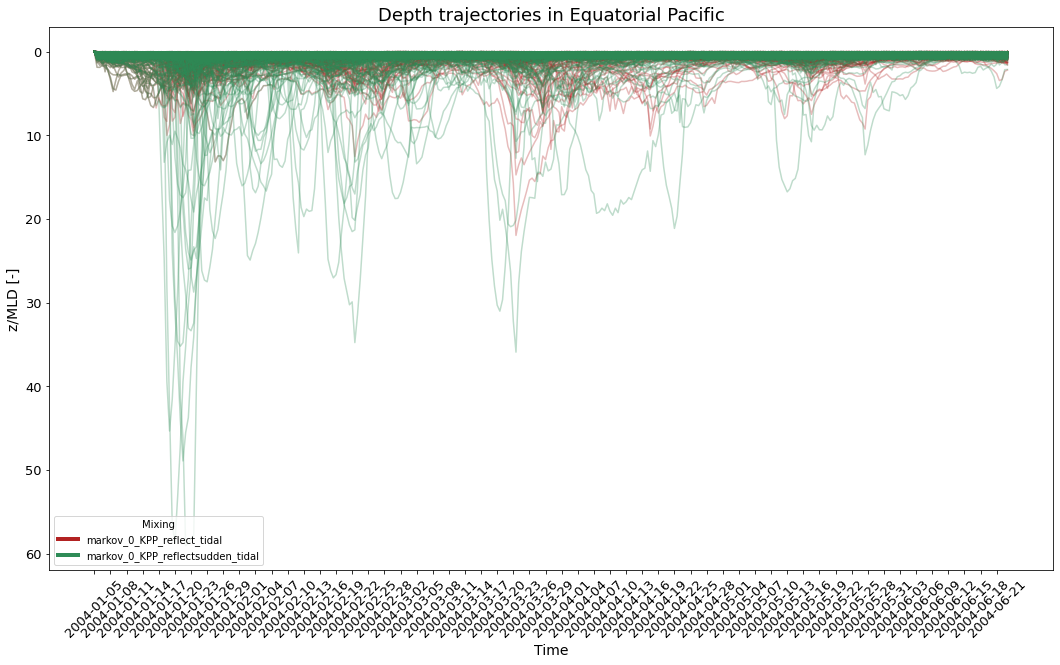

In [16]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].astype('O').T[:,::f_plt], dslist[i]['mld'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[0])

ax.set_title('Depth trajectories in '+regions[region], fontsize=18)
ax.set_ylabel('z/MLD [-]', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticks(times[::6].values)
ax.set_xticklabels(timelabels[::6].values)
ax.tick_params(axis='x', rotation=45)
# ax.set_ylim(5,0)
ax.invert_yaxis()

custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
               Line2D([0], [0], color=mixing_cmap[1], lw=4)]

ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')

plt.show()

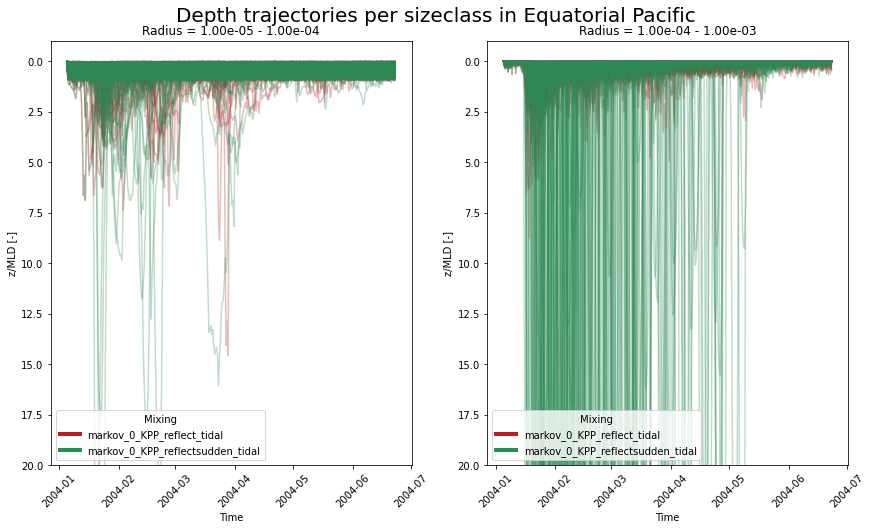

In [31]:
fig = plt.figure(figsize=(12,7), constrained_layout=True)
fig.suptitle('Depth trajectories per sizeclass in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
axes = [ax1, ax2]

for r, ax in enumerate(axes):
    for i in range(len(mixing)):
        split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
        ax.plot(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['mld'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

    ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[r][0].left, right=split_ds[r][0].right))
    ax.set_ylabel('z/MLD [-]')
    ax.set_xlabel('Time')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(20,-1)

    custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                   Line2D([0], [0], color=mixing_cmap[1], lw=4)]

    ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

In [87]:
#print(split_ds)

In [88]:
# fig = plt.figure(figsize=(15,12),constrained_layout=True)
# fig.suptitle('Vertical velocities in '+regions[region], fontsize=20, y=1.03)
# gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[1, 0])
# ax4 = fig.add_subplot(gs[1, 1])
# axes = [[ax1, ax2], [ax3, ax4]]

# for i, axr in enumerate(axes):
#     split_ds = list(dslist[i].groupby_bins('mld',[0,1,1000]))
#     for c, ds in enumerate(split_ds):
#         axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['w_m'], c=w_vel_cmap[0], edgecolor=mixing_cmap[i], alpha=0.7, label = 'w_m '+mixing[i])
#         axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['vs'], c=w_vel_cmap[1], edgecolor=mixing_cmap[i], alpha=0.7, label = 'vs '+mixing[i])
#         axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['w_adv'], c=w_vel_cmap[2], edgecolor=mixing_cmap[i], alpha=0.7, label = 'w_adv '+mixing[i])

#         axr[c].set_xlabel('Time', fontsize=14)
#         axr[c].set_xticks(times[::6].values)
#         axr[c].set_xticklabels(timelabels[::6].values)
#         axr[c].tick_params(axis='both', labelsize=13)
#         axr[c].tick_params(axis='x', rotation=45)
# #         ax.set_ylim(-0.00001,0.00001)
#         axr[c].set_ylabel('Vertical velocity [m/s]', fontsize=14)
#         axr[c].set_title('z/mld = '+ str(split_ds[c][0])+' '+mixing[i]+' mixing', fontsize=16)
#     axr[0].legend(bbox_to_anchor=(-0.12, 1), loc='upper right')

In [25]:
depthbins = np.linspace(0,200,50)
starttimes=(dslist[0]['time'][0,:]-np.timedelta64(int(outputdt/2.), 'h')).values
endtime = (dslist[0]['time'][0,-1]+np.timedelta64(int(outputdt/2.), 'h')).values
timebins = np.append(starttimes,endtime)
depth_densities = np.zeros((len(dslist),len(dslist[0]['obs']),len(depthbins)-1))

for i in range(len(depth_densities)):
    for j in range(len(dslist[i]['obs'])):
        values, bins = np.histogram(dslist[i]['z'].isel(obs=j), depthbins)
        depth_densities[i,j] = values/len(dslist[i]['traj'])

In [90]:
# fig = plt.figure(figsize=(16,6))
# fig.suptitle('Particle depth distribution in '+regions[region], fontsize=20)
# gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,0.1], figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[0, 2])
# axes = [ax1,ax2]
# for i,ax in enumerate(axes):
#     ax.set_facecolor('k')
#     pc = ax.pcolormesh(timebins,depthbins,depth_densities[i].T, cmap='magma')
#     ax.set_title(mixing[i]+' mixing', fontsize=14)
#     ax.set_ylabel('Depth [m]', fontsize=14)
#     ax.tick_params(axis='both', labelsize=13)
#     ax.tick_params(axis='x', rotation=45)
#     ax.invert_yaxis()
# cb = fig.colorbar(pc, cax=ax3)
# cb.set_label('Fraction of particles', size=15)

In [91]:
# fig = plt.figure(figsize=(16,6))
# fig.suptitle('Particle depth distribution in '+regions[region]+' (logarithmic)', fontsize=20)
# gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,0.1], figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[0, 2])
# axes = [ax1,ax2]
# for i,ax in enumerate(axes):
#     ax.set_facecolor('k')
#     pc = ax.pcolormesh(timebins,depthbins,depth_densities[i].T, cmap='magma',norm=mcolors.LogNorm(vmin=1e-3, vmax=1))
#     ax.set_title(mixing[i]+' mixing', fontsize=14)
#     ax.set_ylabel('Depth [m]', fontsize=14)
#     ax.tick_params(axis='both', labelsize=13)
#     ax.tick_params(axis='x', rotation=45)
#     ax.invert_yaxis()
# cb = fig.colorbar(pc, cax=ax3)
# cb.set_label('Fraction of particles - logarithmic', size=15)

In [28]:
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
depth_densities = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs']),len(depthbins)-1))

for k in range(len(dslist)):
    split_ds = list(dslist[k].groupby_bins('r_pl',sizebinedges[::-1]))
    for i in range(len(depth_densities)):
        for j in range(len(dslist[k]['obs'])):
            values, bins = np.histogram(split_ds[i][1]['z'].isel(obs=j), depthbins)
            depth_densities[k,i,j] = values/len(split_ds[i][1]['traj'])

Text(0.5, 0.98, 'Particle depth distribution in Equatorial Pacific (logarithmic)')

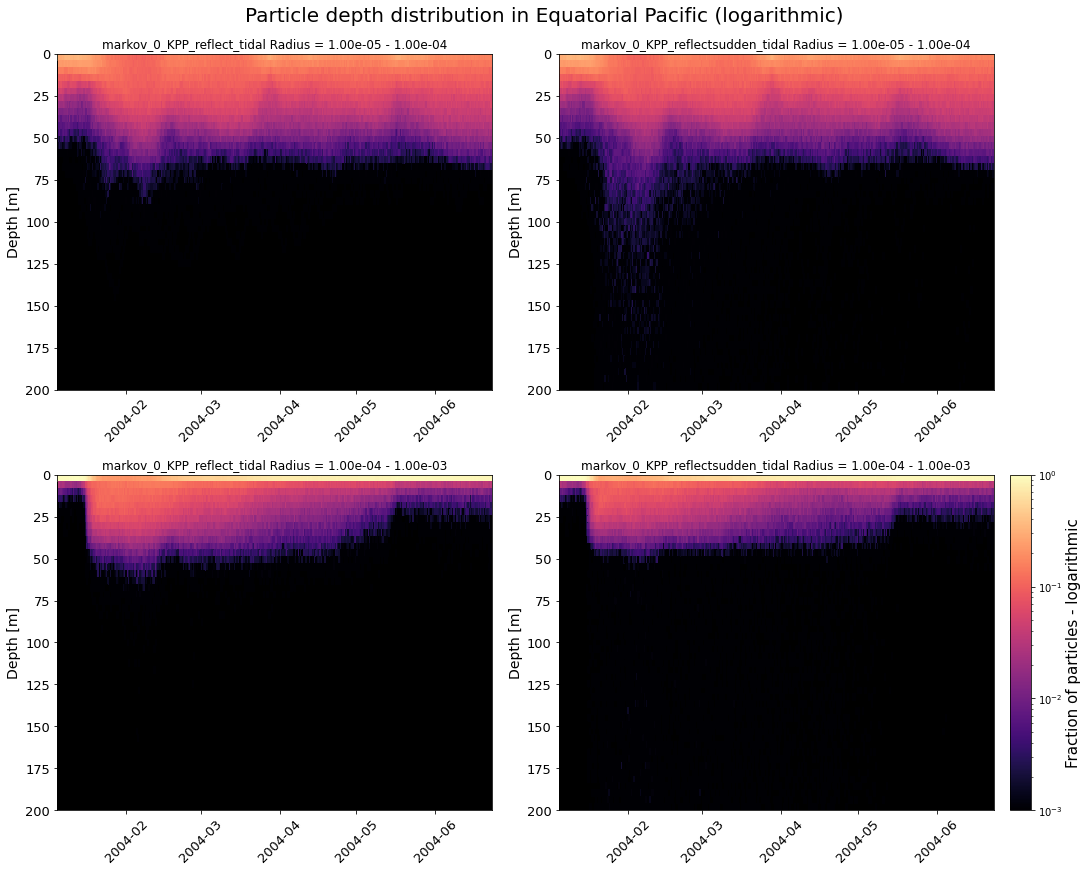

In [30]:
fig = plt.figure(figsize=(15,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
axes = [[ax1, ax2],[ax3,ax4]]

for i, ax_r in enumerate(axes):
    for c, ax in enumerate(ax_r):
        ax.set_facecolor('k')
        pc = ax.pcolormesh(timebins,depthbins,depth_densities[i,c].T, cmap='magma',norm=mcolors.LogNorm(vmin=1e-3, vmax=1))
        #ax.set_title(mixing[0]+' mixing', fontsize=14)
        ax.set_ylabel('Depth [m]', fontsize=14)
        ax.tick_params(axis='both', labelsize=13)
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim(0, 200)
        ax.invert_yaxis()
        #cb.set_label('Fraction of particles - logarithmic', size=15)
        ax.set_title(mixing[i]+' Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
        
cb = fig.colorbar(pc) #, cax=ax3)
cb.set_label('Fraction of particles - logarithmic', size=15)
fig.suptitle('Particle depth distribution in '+regions[region]+' (logarithmic)', fontsize=20)

In [94]:
# split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
# depth_densities = np.zeros((len(split_ds),len(dslist[0]['obs']),len(depthbins)-1))

# for i in range(len(depth_densities)):
#     for j in range(len(dslist[0]['obs'])):
#         values, bins = np.histogram(split_ds[i][1]['z'].isel(obs=j), depthbins)
#         depth_densities[i,j] = values/len(split_ds[i][1]['traj'])



In [95]:
# fig = plt.figure(figsize=(15,12),constrained_layout=True)
# #fig.suptitle('Particle depth distribution in '+regions[region]+' (logarithmic)', fontsize=20)
# gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[1, 0])
# ax4 = fig.add_subplot(gs[1, 1])
# axes = [ax1, ax2, ax3, ax4]

# for c, ax in enumerate(axes):
#     ax.set_facecolor('k')
#     pc = ax.pcolormesh(timebins,depthbins,depth_densities[c].T, cmap='magma',norm=mcolors.LogNorm(vmin=1e-3, vmax=1))
#     #ax.set_title(mixing[0]+' mixing', fontsize=14)
#     ax.set_ylabel('Depth [m]', fontsize=14)
#     ax.tick_params(axis='both', labelsize=13)
#     ax.tick_params(axis='x', rotation=45)
#     ax.set_ylim(0, 200)
#     ax.invert_yaxis()
#     cb.set_label('Fraction of particles - logarithmic', size=15)
#     ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
        
# cb = fig.colorbar(pc) #, cax=ax3)
# cb.set_label('Fraction of particles - logarithmic', size=15)
# fig.suptitle('Markov-0 reflection mixing: Particle depth distribution in '+regions[region]+' (logarithmic)', fontsize=20)

In [17]:
w_bins = [-1e0, -1e-1, -1e-2, -1e-3, -1e-4, -1e-5, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
w_bincenters = [-2e-1, -2e-2, -2e-3, -2e-4, -2e-5, 0, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]
w_list = ['w_m', 'vs_init', 'w_adv', 'w_m_b']
w_list_names = ['KPP Wind mixing', 'Potential settling velocity', 'Model advection',  'Tidal mixing']
w_pdf = np.zeros((len(dslist),len(w_list),len(w_bins)-1))
linestyles=['-','-.']

for i,ds in enumerate(dslist):
    for j,w in enumerate(w_list):
        vals, bins = np.histogram(ds[w], w_bins)
        w_pdf[i,j,:] = vals/ds[w].size

In [18]:
w_widths = np.ones(w_pdf.shape[2])
w_centers = np.arange(w_pdf.shape[2])
w_edges = np.arange(w_pdf.shape[2]+1)-0.5
w_bin_str = [np.format_float_scientific(w,2,exp_digits=1) for w in w_bins]

In [19]:
w_pdf_sizes = np.zeros((len(dslist),len(w_list),len(sizebinedges)-1,len(w_bins)-1))

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for j,w in enumerate(w_list):
        for k,ds_r in enumerate(split_ds):
            vals, bins = np.histogram(ds_r[1][w], w_bins)
            w_pdf_sizes[i,j,k,:] = vals/ds_r[1][w].size

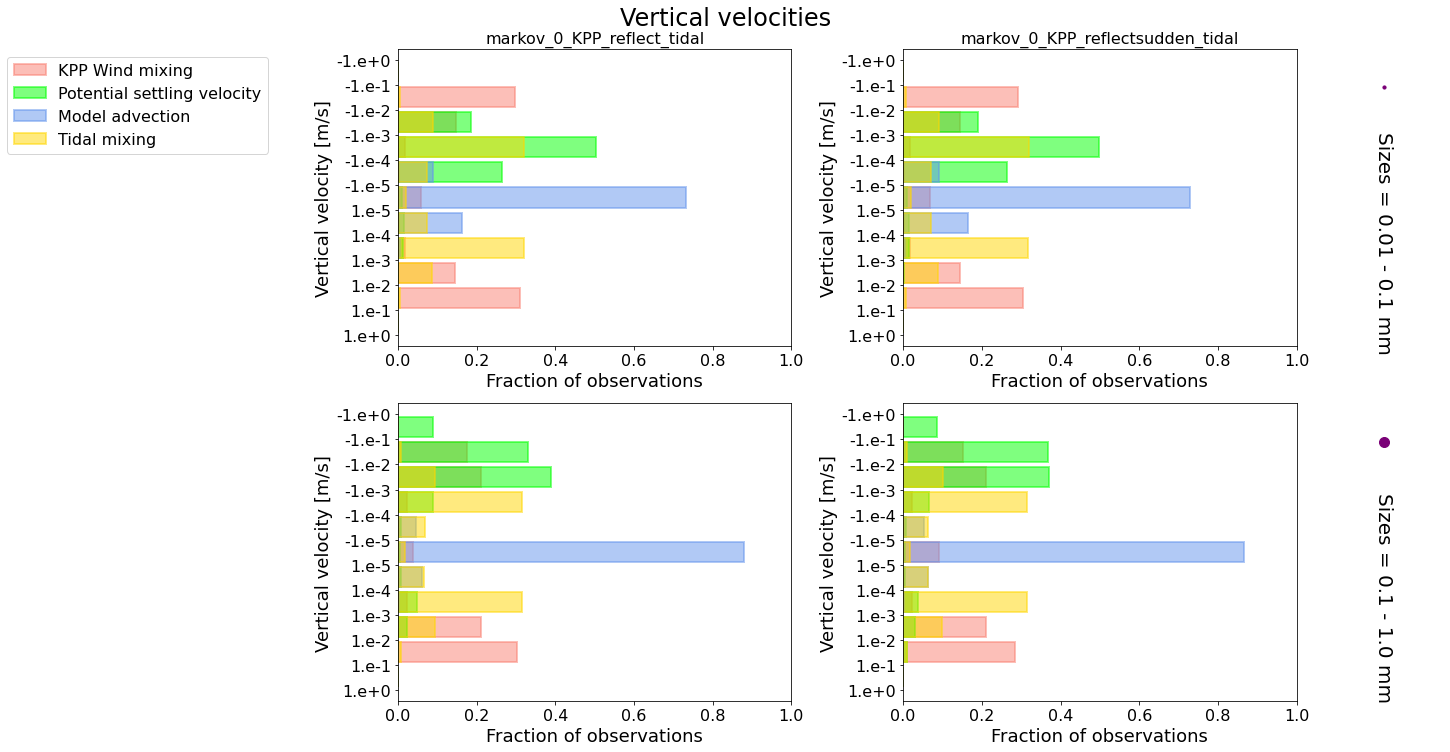

In [20]:
fig = plt.figure(figsize=(20,10),constrained_layout=True)
fig.suptitle('Vertical velocities', fontsize=24, y=1.03)
gs = gridspec.GridSpec(ncols=3, nrows=2, width_ratios=[1,1,0.3],figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
ax9 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 2])
axes = [[ax1, ax2], [ax5, ax6], [ax9, ax10]]

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        for j,w in enumerate(w_list):
            axes[i][k].barh(w_centers, w_pdf_sizes[i,j,k], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w_list_names[j])
        axes[i][k].set_xlim(0,1.)
        axes[i][k].set_yticks(w_edges)
        axes[i][k].set_yticklabels(w_bin_str)
        axes[i][k].invert_yaxis()
        axes[i][k].tick_params(axis='both', labelsize=16)
        axes[i][k].set_xlabel('Fraction of observations', fontsize=18)
        axes[i][k].set_ylabel('Vertical velocity [m/s]', fontsize=18)
    axes[i][0].set_title(mixing[i], fontsize=16)
    
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
for k, ds_r in enumerate(split_ds):
    axes[2][k].scatter(0.5,0.87,s=sizebinedges[-k-1]*1000000,color=r_pl_clist[0])
    axes[2][k].set_ylim(0,1)
    axes[2][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=270,fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[2][k].axis('off')
axes[0][0].legend(fontsize=16, bbox_to_anchor=(-0.31, 1))

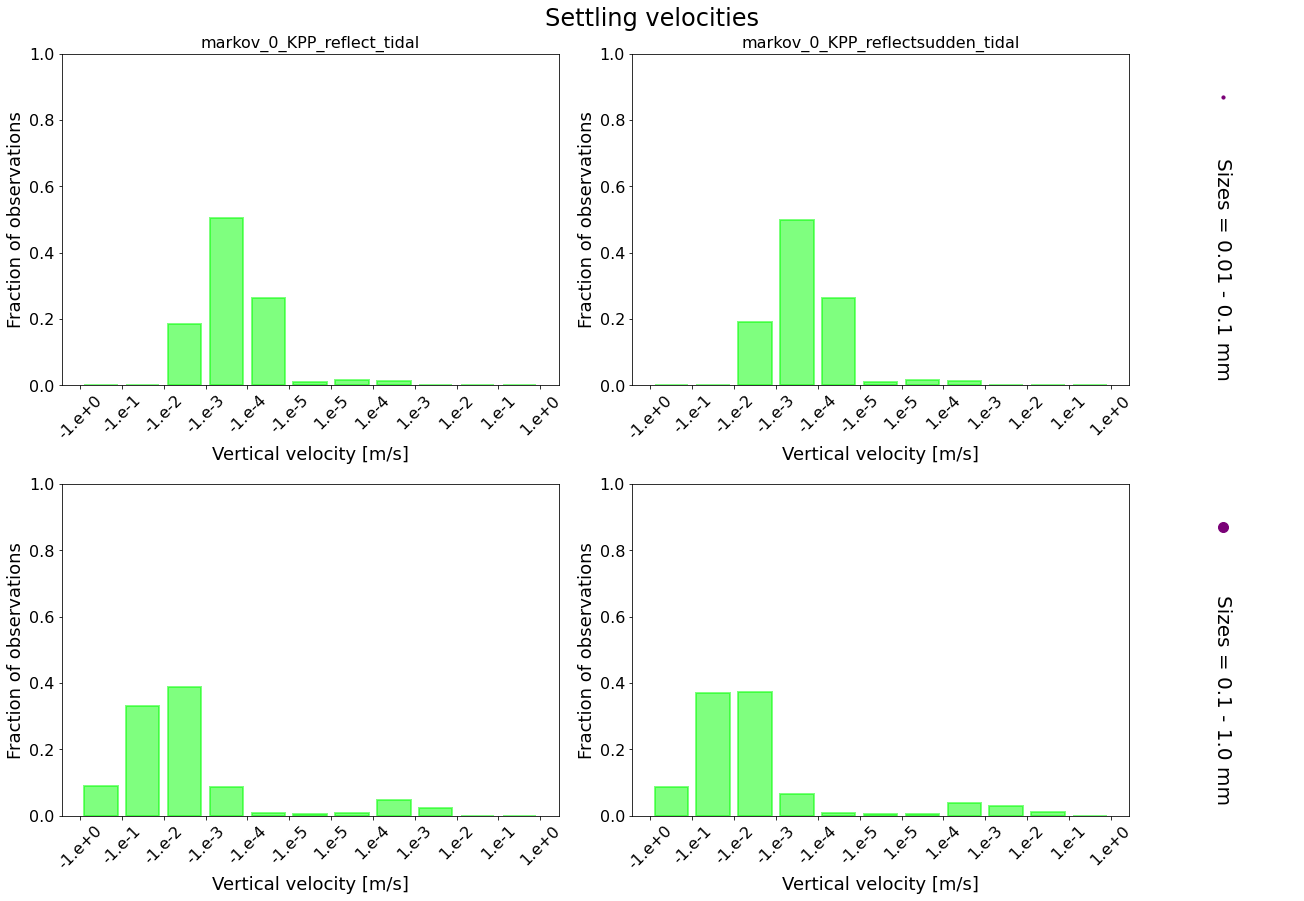

In [22]:
fig = plt.figure(figsize=(18,12),constrained_layout=True)
fig.suptitle('Settling velocities', fontsize=24, y=1.03)
gs = gridspec.GridSpec(ncols=3, nrows=2, width_ratios=[1,1,0.3],figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
ax9 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 2])
axes = [[ax1, ax2], [ax5, ax6], [ax9, ax10]]

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        axes[i][k].bar(w_centers, w_pdf_sizes[i,1,k], align='center', alpha=0.5, color=w_vel_cmap[1], edgecolor=w_vel_cmap[1], linewidth=2, label=w_list_names[1])
        axes[i][k].set_ylim(0,1.)
        axes[i][k].set_xticks(w_edges)
        axes[i][k].set_xticklabels(w_bin_str)
        axes[i][k].tick_params(axis='x', rotation=45)
#         axes[i][k].invert_yaxis()
        axes[i][k].tick_params(axis='both', labelsize=16)
        axes[i][k].set_ylabel('Fraction of observations', fontsize=18)
        axes[i][k].set_xlabel('Vertical velocity [m/s]', fontsize=18)
    axes[i][0].set_title(mixing[i], fontsize=16)
    
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
for k, ds_r in enumerate(split_ds):
    axes[2][k].scatter(0.5,0.87,s=sizebinedges[-k-1]*1000000,color=r_pl_clist[0])
    axes[2][k].set_ylim(0,1)
    axes[2][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=270,fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[2][k].axis('off')

Text(0.5, 0.98, 'Particle depth distribution in North Pacific Subtropical Gyre after 80.0 days')

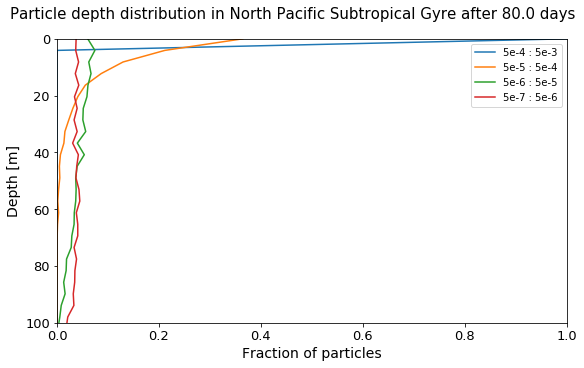

In [96]:
fig = plt.figure(figsize=(8,5),constrained_layout=True)
ax=plt.axes()
tot_days = (len(depth_densities[0,:,0])-1)/2
sizebinlegend = ['5e-4 : 5e-3', '5e-5 : 5e-4', '5e-6 : 5e-5', '5e-7 : 5e-6']

for c in range(len(depth_densities)):
    #ax.set_facecolor('k')
    ax.plot(depth_densities[c][-1][:],depthbins[:-1])
    #ax.set_title(mixing[0]+' mixing', fontsize=14)
    ax.set_ylabel('Depth [m]', fontsize=14)
    ax.set_xlabel('Fraction of particles', fontsize=14)
    ax.tick_params(axis='both', labelsize=13)
    #ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, 100)
    ax.set_xlim(0,1.0)
    ax.invert_yaxis()
    ax.legend(sizebinlegend) 
    #cb.set_label('Fraction of particles - logarithmic', size=15)
    #ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
#ax.set_xscale('log')       
#cb.set_label('Fraction of particles - logarithmic', size=15)
fig.suptitle(f'Particle depth distribution in {regions[region]} after {tot_days} days', fontsize=15)

In [97]:
'''Determine % of particles found at the surface, in mixed layer and below'''

surf = np.zeros((len(split_ds),len(dslist[0]['obs'])))
mld = np.zeros((len(split_ds),len(dslist[0]['obs'])))
deep = np.zeros((len(split_ds),len(dslist[0]['obs'])))

for i in range(len(split_ds)):
    for j in range(len(dslist[0]['obs'])):
        mld_p = split_ds[i][1]['mld'].isel(obs=j)
        z_p = split_ds[i][1]['z'].isel(obs=j)
        s = np.where(z_p==0.6)[0]
        m = np.where((mld_p<=1.0) & (z_p>0.6))[0]
        d = np.where(mld_p>1.0)[0]
        tot_p = len(s)+len(m)+len(d) # since some particles are deleted and become NaN so not always 2500 particles per size class
        surf[i,j] = len(s)/tot_p #len(split_ds[i][1]['traj']))
        mld[i,j] = len(m)/tot_p 
        deep[i,j] = len(d)/tot_p 
        #deep[j] = (mld_p>1.0).sum()/len(split_ds[i][1]['traj'])

In [98]:
# mixing = ['no','fixed','markov_0_KPP_reflect']

# ds_0 = xr.open_dataset(datadir2+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
# ds_1 = xr.open_dataset(datadir2+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
# ds_2 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[1]+'_tidalmixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
# dslist = [ds_0, ds_1, ds_2]

In [99]:
# depth_densities_mld = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs']),len(depthbins)-1))

# for di in range(len(dslist)):
#     split_ds = list(dslist[di].groupby_bins('r_pl',sizebinedges[::-1]))

#     for i in range(len(depth_densities)):
#         for j in range(len(dslist[0]['obs'])):
#             values, bins = np.histogram(split_ds[i][1]['mld'].isel(obs=j), depthbins)
#             depth_densities_mld[di,i,j] = values/len(split_ds[i][1]['traj'])

In [100]:
surf = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs'])))
mld = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs'])))
deep = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs'])))

for di in range(len(dslist)):
    split_ds = list(dslist[di].groupby_bins('r_pl',sizebinedges[::-1]))
    for i in range(len(split_ds)):
        for j in range(len(dslist[0]['obs'])):
            mld_p = split_ds[i][1]['mld'].isel(obs=j)
            z_p = split_ds[i][1]['z'].isel(obs=j)
            s = np.where(z_p==0.6)[0]
            m = np.where((mld_p<=1.0) & (z_p>0.6))[0]
            d = np.where(mld_p>1.0)[0] #(mld_p>1.0).sum()/len(split_ds[i][1]['traj'])
            tot_p = len(s)+len(m)+len(d) # since some particles are deleted and become NaN so not always 2500 particles per size class
            surf[di,i,j] = len(s)/tot_p 
            mld[di,i,j] = len(m)/tot_p 
            deep[di,i,j] = len(d)/tot_p 

Text(0.5, 0.98, 'Particle depth distribution in North Pacific Subtropical Gyre after 80 days')

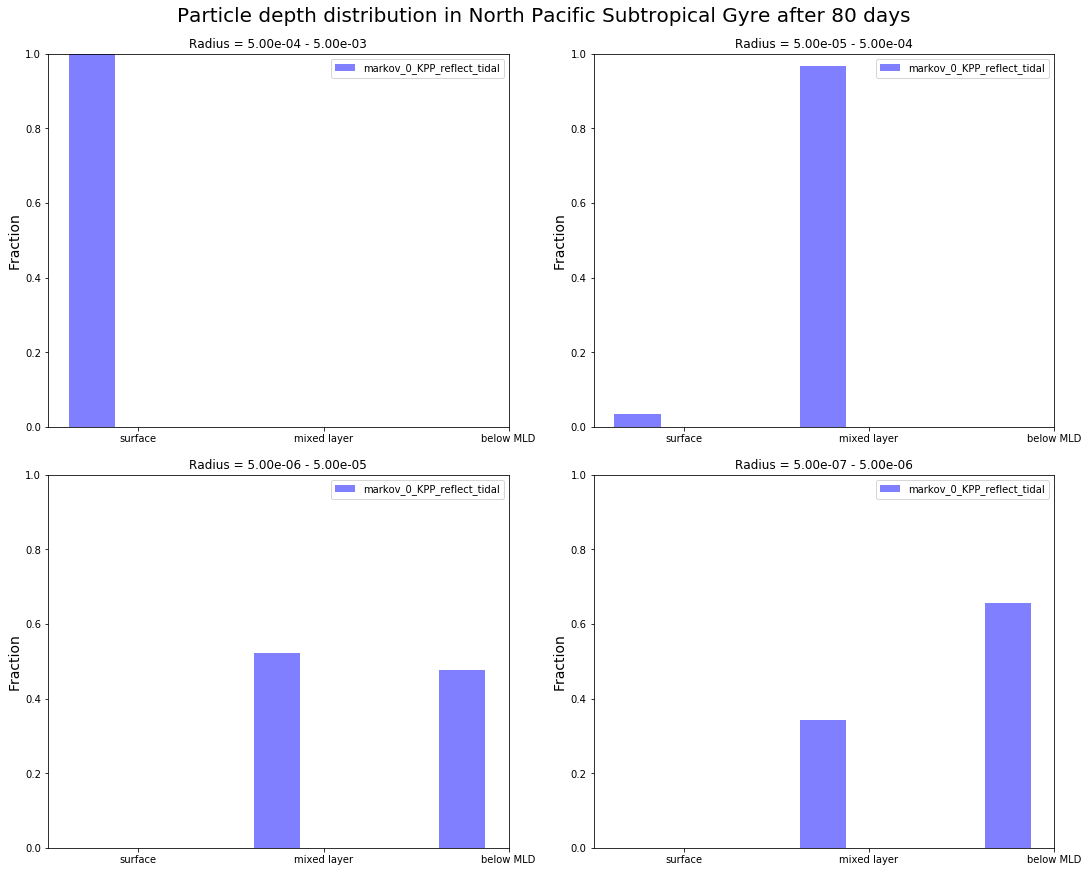

In [101]:
day = 80
fig = plt.figure(figsize=(15,12),constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [ax1, ax2, ax3, ax4]
xlab = ['surface','mixed layer','below MLD']
x_pos = np.arange(len(xlab))
bar_width = 0.25


for c, ax in enumerate(axes):
    surf_p = surf[:,c,day*2]
    mld_p = mld[:,c,day*2]
    deep_p = deep[:,c,day*2]
    kpp_mix = [surf_p[0],mld_p[0],deep_p[0]]
    #no_mix = [surf_p[1],mld_p[1],deep_p[1]]
    #kpp_mix = [surf_p[2],mld_p[2],deep_p[2]]


    ax.bar(x_pos-bar_width, kpp_mix, color='b', alpha=0.5, width = bar_width) #depth_densities_mld[0][c][day*2], color='b', alpha=0.5, width = bar_width)
    #ax.bar(x_pos, no_mix, color='g',  alpha=0.5, width = bar_width)
    #ax.bar(x_pos+bar_width, kpp_mix, color='r', alpha=0.5, width = bar_width)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(xlab)
    ax.set_title(mixing[0]+' mixing', fontsize=14)
    ax.set_ylabel('Fraction', fontsize=14)
    #ax.tick_params(axis='both', labelsize=13)
    #ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, 1)
    ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
    ax.legend(mixing)
    
fig.suptitle('Particle depth distribution in '+regions[region]+' after '+str(day)+' days', fontsize=20)

In [102]:
'''Abundance at surface at the beginning and end of the simulation'''

#sizebinedges = np.linspace(1e-3,1e-6,10000) #[1e-3, 0.5e-3, 1e-4, 1e-5, 1e-6]



'Abundance at surface at the beginning and end of the simulation'

In [103]:
# sizebinedges = np.linspace(1e-3,1e-6,400)
# surf = np.zeros((len(dslist),len(sizebinedges),len(dslist[0]['obs'])))

# for di in range(len(dslist)):
#     split_ds = list(dslist[di].groupby_bins('r_pl',sizebinedges[::-1]))
#     for i in range(len(split_ds)):
#         for j in range(len(dslist[0]['obs'])):
#             #mld_p = split_ds[i][1]['mld'].isel(obs=j)
#             z_p = split_ds[i][1]['z'].isel(obs=j)
#             s = np.where(z_p==0.6)[0]
#             #tot_p = len(s)#+len(m)+len(d) # since some particles are deleted and become NaN so not always 2500 particles per size class
#             if any.split_ds[i][1]['r_pl']
#             surf[di,i,j] = len(s)#/tot_p 

In [104]:
# z_p = split_ds[0][1]['z'].isel(obs=-1) #, traj=i)
# s = np.where(z_p==0.6) 
# r_pl_s = split_ds[ds][1]['r_pl']#.isel(traj = s[0])
# test = r_pl_s[s]
# print(test)

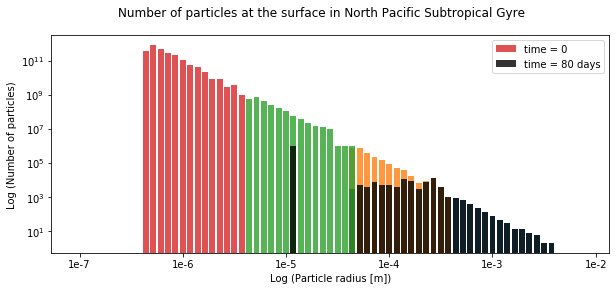

In [105]:
import math 
num_bins = 70
time_tot = len(dslist[0]['obs'])
sizebinedges = [5e-3, 5e-4, 5e-5, 5e-6, 5e-7]
fig = plt.figure(figsize=(10,4))
ax=plt.axes()
#sizebinedges = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
x = range((num_bins)*len(sizebinedges)) 
#x_pos = np.linspace(0,num_bins,8) #0,num_bins-1,num_bins*2-2,num_bins*3-3,num_bins*4-4,num_bins*5-5]
xlab = ['1e-7','1e-6','1e-5','1e-4','1e-3','1e-2']
xpos = np.linspace(0,num_bins,len(xlab))
for ds in range(len(split_ds)):
    values, bins = np.histogram(split_ds[ds][1]['r_pl'],np.logspace(-7,-2,num_bins)) ##math.floor(np.log10(split_ds[ds][1]['r_pl'].min()).round()),math.ceil(np.log10(split_ds[ds][1]['r_pl'].max()).round()),num_bins))
    
    z_p = split_ds[ds][1]['z'].isel(obs=-1) 
    s = np.where(z_p==0.6) 
    r_pl_all = split_ds[ds][1]['r_pl']
    r_pl_s = r_pl_all[s]
    values2, bins2 = np.histogram(r_pl_s,np.logspace(-7,-2,num_bins))#math.floor(np.log10(split_ds[ds][1]['r_pl'].min()).round()),math.ceil(np.log10(split_ds[ds][1]['r_pl'].max()).round()),num_bins))
    
    if ds == 0:
        i = 3        
    if ds ==1:
        values = values*1e3
        values2 = values2*1e3
        i = 2
    if ds == 2:
        values = values*1e6
        values2 = values2*1e6
        i = 1
    elif ds == 3:
        values = values*1e9
        values2 = values2*1e9
        i = 0
    
    ax1 = ax.bar(np.arange(num_bins-1),values,alpha = 0.8) #x[0+i*(num_bins-1):(num_bins-1)+i*(num_bins-1)],values)  
    ax2 = ax.bar(np.arange(num_bins-1),values2,alpha = 0.8,color = 'k') #x[0+i*(num_bins-1):(num_bins-1)+i*(num_bins-1)],values2,color = 'k')

#ax.set_xscale('log')
ax.set_xticks(xpos)
ax.set_xticklabels(xlab)
ax.set_yscale('log')
ax.set_ylabel('Log (Number of particles)')
ax.set_xlabel('Log (Particle radius [m])')
ax.legend((ax1,ax2),('time = 0','time = 80 days'))
fig.suptitle('Number of particles at the surface in '+regions[region]) # at time = 0 and time = '+str((time_tot-1)/2)+' days', fontsize=20)
plt.show()

In [106]:
print(split_ds)

[(Interval(0.0005, 0.005, closed='right'), <xarray.Dataset>
Dimensions:     (obs: 161, traj: 2500)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] 2004-01-05 ... 2004-03-25
    lat         (traj, obs) float64 ...
    lon         (traj, obs) float64 ...
    z           (traj, obs) float64 ...
    u           (traj, obs) float32 ...
    v           (traj, obs) float32 ...
    w           (traj, obs) float32 ...
    w_adv       (traj, obs) float32 ...
    tpp3        (traj, obs) float32 ...
    d_phy       (traj, obs) float32 ...
    nd_phy      (traj, obs) float32 ...
    a           (traj, obs) float32 ...
    a_coll      (traj, obs) float32 ...
    a_growth    (traj, obs) float32 ...
    a_resp      (traj, obs) float32 ...
    vs          (traj, obs) float32 ...
    w_m         (traj, obs) float32 ...
    w_m_b       (traj, obs) float32 ...
    mld         (traj, obs) float32 ...
    rho_tot   

In [107]:
for i in range(len(split_ds)):
    print(split_ds[i][1]['w_10'].min())
    print(split_ds[i][1]['w_10'].max())

KeyError: 'w_10'